In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
from fastai.metrics import *
import pretrainedmodels
from fastai.vision.learner import model_meta
from fastai.callbacks import EarlyStoppingCallback,SaveModelCallback,TerminateOnNaNCallback,OverSamplingCallback,CSVLogger
from torchvision.models import *
import pretrainedmodels
import fastai
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from ipyexperiments import *
from utils import *
import sys
import fastai.vision.models as Mods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
%matplotlib inline
import numpy as np

### Resnet architecture

In [15]:
# arch=models.resnet50(pretrained=True)
# classifier = nn.Sequential(nn.Linear(2048, 1024),
#                        nn.ReLU(),
#                        nn.Linear(1024, 512),
#                        nn.ReLU(),
#                        #nn.Linear(512, 128),
#                        #nn.ReLU(),                           
#                        nn.Dropout(p=0.3),
#                        nn.Linear(512,2)).cuda() 


# arch.fc = classifier    
# arch=arch.cuda()

In [16]:
# #from torchvision
# model = models.resnet50(pretrained=True).cuda()
# # for param in model.parameters():
# #     param.requires_grad=False
# model.fc = nn.Sequential(
#                nn.Linear(2048, 512),
#                nn.ReLU(inplace=True),
#     nn.Linear(512,256),
#     nn.ReLU(inplace=True),
#     nn.Linear(256,128),
#     nn.ReLU(inplace=True),
#     nn.Dropout2d(p=0.3),
#     nn.Linear(128, 2)).cuda()

In [17]:
# #from torchvision
# model = models.resnet50(pretrained=True) #cuda()
# # for param in model.parameters():
# #     param.requires_grad=False
# model.fc = nn.Sequential(
#                nn.Linear(2048, 512),
#                nn.ReLU(inplace=True),
#     nn.Linear(512,256),
#     nn.ReLU(inplace=True),
#     nn.Linear(256,128),
#     nn.ReLU(inplace=True),
#     nn.Dropout2d(p=0.3),
#     nn.Linear(128, 2)).cuda()

In [2]:
### define batch_size and path 
bs =10
PATH = "/media/advenio/Projects/AdvenioProject/Good_Bad_dataset/Dataset"

### Loading Data

In [3]:
image_size=128
batchsize=50
tfms=get_transforms(flip_vert=False,max_zoom=1.2,p_affine=0.4)
data=(ImageList.from_folder(PATH)
      .split_by_folder(train='Train',valid='Valid')
      .label_from_folder().transform(tfms,size=128).databunch(bs=batchsize))
      

In [4]:
# np.random.seed(42)
# tfms = get_transforms()

In [5]:
# data = ImageDataBunch.from_folder(PATH, train='Train',valid="Valid",ds_tfms=tfms,size=(128,128), bs=bs).normalize(imagenet_stats)

In [6]:
print(f"Train : \n{data.train_ds.y} \n \nValidation : \n{data.valid_ds.y}")

Train : 
CategoryList (42038 items)
Bad,Bad,Bad,Bad,Bad
Path: /media/advenio/Projects/AdvenioProject/Good_Bad_dataset/Dataset 
 
Validation : 
CategoryList (2629 items)
Bad,Bad,Bad,Bad,Bad
Path: /media/advenio/Projects/AdvenioProject/Good_Bad_dataset/Dataset


In [7]:
data.sanity_check

<bound method DataBunch.sanity_check of ImageDataBunch;

Train: LabelList (42038 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Bad,Bad,Bad,Bad,Bad
Path: /media/advenio/Projects/AdvenioProject/Good_Bad_dataset/Dataset;

Valid: LabelList (2629 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Bad,Bad,Bad,Bad,Bad
Path: /media/advenio/Projects/AdvenioProject/Good_Bad_dataset/Dataset;

Test: None>

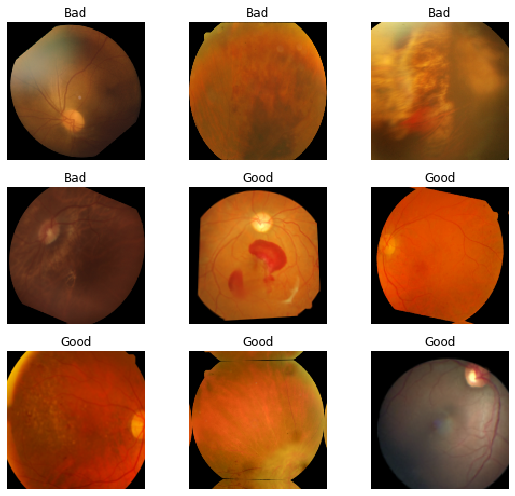

In [8]:
data.show_batch(rows=3, figsize=(8,7))

In [11]:
print(data.classes)
len(data.classes),data.c

['Bad', 'Good']


(2, 2)

### Training: renet50

In [12]:
precision=Precision()
recall=Recall()
matthews=MatthewsCorreff()
roc_auc_score=AUROC()

In [13]:
default_devics=torch.device('cuda')

In [14]:
learn = cnn_learner(data,models.resnet50,metrics=[error_rate,accuracy,precision,recall,roc_auc_score,matthews],callback_fns=[ShowGraph],opt_func=optim.Adam,pretrained=True)
#learn = Learner(data,model,metrics=[error_rate,accuracy,precision,recall,roc_auc_score,matthews],callback_fns=[ShowGraph],opt_func=optim.Adam)

In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-04
Min loss divided by 10: 7.59E-04


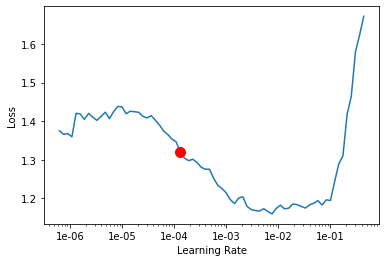

In [16]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [16]:
## Image Size 128*128 

## Callback to save model which having best auroc score
##learn_ovrs.fit_one_cycle(5,1e-4, callbacks=[SaveModelCallback(learn, every='improvement', monitor='auroc', name='Path+name_of_model')])

#learn.fit_one_cycle(20,max_lr=slice(4.79E-06))


epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,auroc,matthews_correff,time
0,0.648567,0.603096,0.233929,0.766071,0.842528,0.647149,0.862946,0.545297,17:39
1,0.449725,0.507394,0.230506,0.769494,0.844622,0.653313,0.870512,0.551677,16:25
2,0.385602,0.433647,0.193229,0.806771,0.834179,0.759630,0.889214,0.615459,16:08
3,0.342932,0.435779,0.172689,0.827311,0.872134,0.761941,0.898823,0.659194,15:50
4,0.341988,0.418749,0.191327,0.808672,0.844753,0.750385,0.898868,0.620553,16:10
5,0.317469,0.459184,0.192849,0.807151,0.861848,0.725732,0.892549,0.621117,16:08
6,0.299237,0.439245,0.186383,0.813617,0.826861,0.787365,0.897010,0.627655,15:46


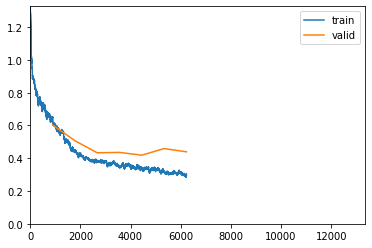

Better model found at epoch 0 with accuracy value: 0.7660707235336304.
Better model found at epoch 1 with accuracy value: 0.7694941163063049.
Better model found at epoch 2 with accuracy value: 0.8067706227302551.
Better model found at epoch 3 with accuracy value: 0.8273107409477234.


KeyboardInterrupt: 

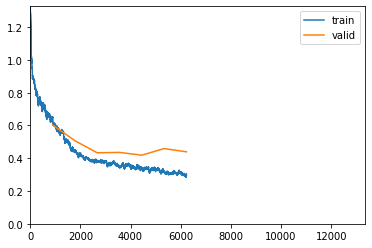

In [17]:
learn.fit_one_cycle(15,slice(1e-03),callbacks=[OverSamplingCallback(learn),TerminateOnNaNCallback(),CSVLogger(learn),SaveModelCallback(learn, every='improvement', monitor='accuracy', name='/home/advenio/Desktop/r-d/src/Fundus_Non_Fundus_Classifer/Weights/D_ND_resnet_w_128_50K')])

In [1]:
#learn.save("/home/advenio/Desktop/r-d/src/Fundus_Non_Fundus_Classifer/Weights/D_ND_resnet_w_256")

In [17]:
#learn.export('/home/advenio/Desktop/r-d/src/Fundus_Non_Fundus_Classifer/Weights/Diagnosable_Non-Diagnosable_256_resnet50_90_new_dataset.pkl')

#### Results:

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
confusion_matrix=interp.confusion_matrix()

In [ ]:
'''For 2 classes only'''
TPR=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
TNR=confusion_matrix[0][0]/(confusion_matrix[0][1]+confusion_matrix[0][0])

In [ ]:
print(f"sensitivity - {TPR}")
print(f"specificity - {TNR}")

In [27]:
#from sklearn import metrics
#confusion_matrix=metrics.confusion_matrix(df.labels, df.predictions)

#confusion_matrix=interp.confusion_matrix()
[[tn, fp], [fn, tp]]=interp.confusion_matrix()

In [28]:
#sensitivity, recall, hit rate, or true positive rate (TPR)
sensitivity=tp/(tp+fn)
#specificity, selectivity or true negative rate (TNR)
specificity=tn/(tn+fp)
#precision or positive predictive value (PPV)
ppv=tp/(tp+fp)
#negative predictive value (NPV)
npv=tn/(tn+fn)
#miss rate or false negative rate (FNR)
fnr=fn/(fn+tp)
#fall-out or false positive rate (FPR)
fpr=fp/(fp+tn)
#false discovery rate (FDR)
fdr=fp/(fp+tp)
#false omission rate (FOR)
FOR=fn/(fn+tn)
#Threat score (TS) or Critical Success Index (CSI)
TS=tp/(tp+fn+fp)
#accuracy (ACC)
ACC=(tp+tn)/(tp+tn+fp+fn)
#balanced accuracy (BA)
BA=(sensitivity+specificity)/2
#F1 score
f1=2*tp/(2*tp+fp+fn)
##Matthews correlation coefficient (MCC)
MCC=((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
##Informedness or Bookmaker Informedness (BM)
BM=sensitivity+specificity-1
#Markedness (MK)
MK=ppv+npv-1

In [30]:
print(f"sensitivity - {sensitivity}")
print(f"specificity - {specificity}")
print(f"ppv - {ppv}")
print(f"npv - {npv}")
print(f"fnr - {fnr}")
print(f"fpr - {fpr}")
print(f"fdr - {fdr}")
print(f"FOR - {FOR}")
print(f"TS - {TS}")
print(f"ACC - {ACC}")
print(f"BA - {BA}")
print(f"f1 - {f1}")
print(f"MCC - {MCC}")
print(f"BM - {BM}")
print(f"MK - {MK}")

sensitivity - 0.9072769953051644
specificity - 0.9223412394797246
ppv - 0.9195083267248215
npv - 0.9104984894259819
fnr - 0.09272300469483569
fpr - 0.07765876052027544
fdr - 0.08049167327517844
FOR - 0.08950151057401813
TS - 0.8405219282348677
ACC - 0.9148936170212766
BA - 0.9148091173924444
f1 - 0.9133517132729421
MCC - 0.8298125027224255
BM - 0.8296182347848888
MK - 0.8300068161508034


In [2]:
# src_path="/home/advenio/Desktop/r-d/Diagnosable_Non-Diagnosable/Weights/image size_256_weight"
# model_name="Diagnosable_Non-Diagnosable_256_resnet50_90_new_dataset.pkl"

In [5]:
# learn = load_learner(src_path,model_name)

In [ ]:
data={'predictions':[],
'labels':[],
'images':[],
     'probabilities':[]}
path='/home/advenio/Desktop/r-d/Diagnosable_Non-Diagnosable/New_Dataset/Dataset/Valid'
for label in os.listdir(path):
    label_path=path+'/'+label
    for file in os.listdir(label_path):
        #print(file)
        image_path=label_path+'/'+file
        #print(image_path)
        prediction=learn.predict(open_image(image_path))
        data['probabilities'].append(list(prediction[2].numpy()))
        data['predictions'].append(str(prediction[0]))
        data['labels'].append(label)
        data['images'].append(image_path)
        
# for i in range(len(data['labels'])):
#     data['labels'][i]=int(data['labels'][i])
# writing stuff to csv
# import pandas as pd
# csv=pd.DataFrame(data)
# csv.to_csv('3-class-30k.csv')

In [ ]:
# df=pd.DataFrame(data)
# df.labels.value_counts()

In [ ]:
# df.head()

In [ ]:
# ## Confusion matrix 
# #import pandas as pd
# import seaborn as sn

# confusion_matrix = pd.crosstab(df['labels'], df['predictions'], rownames=['Actual'], colnames=['Predicted'])

# ax=sn.heatmap(confusion_matrix, annot=True,cmap='Blues', fmt='g')
# #ax = sns.heatmap(df_corr, annot=True) #notation: "annot" not "annote"
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# from sklearn import metrics
# confusion_matrix=metrics.confusion_matrix(df.labels, df.predictions)
# [[tn, fp], [fn, tp]]=metrics.confusion_matrix(df.labels, df.predictions)

In [ ]:
# '''For 2 classes only'''
# TPR=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
# TNR=confusion_matrix[0][0]/(confusion_matrix[0][1]+confusion_matrix[0][0])

In [ ]:
# print(f"sensitivity - {TPR}")
# print(f"specificity - {TNR}")

## ONXX

In [4]:
# from torch.autograd import Variable
# import io
# import numpy as np
# from torch import nn
# import torch.utils.model_zoo as model_zoo
# import torch.onnx
# import torchvision
# import torch

In [25]:
# # Input to the model
# x = torch.randn(1,3, 512,512, requires_grad=False).cuda()
# torch_out = learn.model;torch_out

In [ ]:
# # Export the model
# torch.onnx.export(learn.model,               # model being run
#                   x,                         # model input (or a tuple for multiple inputs)
#                   "fundus_non_fundus_pytorch.onnx",   # where to save the model (can be a file or file-like object)
#                   export_params=True,        # store the trained parameter weights inside the model file
#                   opset_version=10,          # the ONNX version to export the model to
#                   do_constant_folding=True,  # whether to execute constant folding for optimization
#                   input_names = ['input'],   # the model's input names
#                   output_names = ['output'], # the model's output names
#                   )

In [26]:
# import onnx
# onnx_model = onnx.load("fundus_non_fundus_pytorch_1.onnx")
# onnx.checker.check_model(onnx_model)

In [ ]:
# import onnxruntime

# ort_session = onnxruntime.InferenceSession("fundus_non_fundus_pytorch_1.onnx")

# def to_numpy(tensor):
#     return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# # compute ONNX Runtime output prediction
# ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(x)}
# ort_outs = ort_session.run(None, ort_inputs)

# # compare ONNX Runtime and PyTorch results
# np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

# print("Exported model has been tested with ONNXRuntime, and the result looks good!")

In [ ]:
# from PIL import Image
# import torchvision.transforms as transforms

# img = Image.open("/home/advenio/Desktop/r-d/Fundus-Non-Fundus_Classifier/Dataset/Valid/NF/1.2.276.0.75.2.3.20.1.3.130911151425625.109946082496.png")

In [27]:
# to_tensor = transforms.ToTensor()
# img_y = to_tensor(img)
# img_y.unsqueeze_(0)

In [49]:
# img_y.shape

torch.Size([1, 3, 2112, 2438])

In [50]:
# ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_y)}
# ort_outs = ort_session.run(None, ort_inputs)
# img_out_y = ort_outs[0]

In [51]:
# img_out_y

array([[0.149834, 1.03749 ]], dtype=float32)

In [52]:
# from torch.nn import functional as F
# ten = torch.from_numpy(img_out_y)
# prob = F.softmax(ten, dim=1)
# prob

tensor([[0.2916, 0.7084]])

In [40]:
data['images'][0]

'/home/advenio/Desktop/r-d/Diagnosable_Non-Diagnosable/New_Dataset/Dataset/Valid/ND/ARMD R DHANAPAL_E_01-01-1939_1123_(0005).jpg'

In [41]:
len("/home/advenio/Desktop/r-d/Diagnosable_Non-Diagnosable/New_Dataset/Dataset/Valid/ND/")

83

In [32]:
tp=tn=fp=fn=0
dest_path="/home/advenio/Desktop/r-d/Diagnosable_Non-Diagnosable/Results/Results_new_dataset/Result_256"
for i in range(len(data['labels'])):
    if data['labels'][i]=="D":
        if data['predictions'][i]=="D":
            tn+=1
            #shutil.copy(data['images'][i],dest_path+'/tn/'+data['images'][i][73:])
        else:
            fp+=1
            shutil.copy(data['images'][i],dest_path+'/fp/'+data['images'][i][83:])
    elif data['labels'][i]=="ND":
        if data['predictions'][i]=="ND":
            tp+=1
            #shutil.copy(data['images'][i],dest_path+'/tp/'+data['images'][i][73:])
        else:
            fn+=1
            shutil.copy(data['images'][i],dest_path+'/fn/'+data['images'][i][83:])

In [33]:
print(f"tp-{tp}, fp- {fp}, fn - {fn}, tn - {tn}")

tp-2319, fp- 203, fn - 237, tn - 2415
